In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

There are two ways to combine datasets in geopandas – **attribute joins** and **spatial joins**.

### Appending

In a Spatial Join, observations from two GeoSeries or GeoDataFrame are combined based on their spatial relationship to one another.

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})

In [3]:
# Appending GeoSeries
joined = world.geometry.append(cities.geometry) # On ajoute à la géométrie world la géométrie des villes 

# Appending GeoDataFrames
europe = world[world.continent == 'Europe']
asia = world[world.continent == 'Asia']
eurasia = europe.append(asia)

<AxesSubplot:>

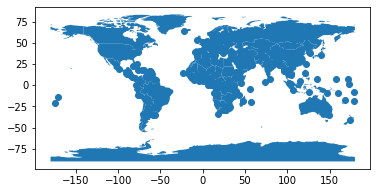

In [4]:
joined.plot()

<AxesSubplot:>

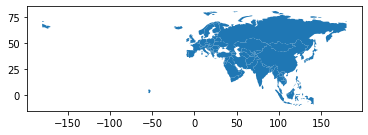

In [5]:
eurasia.plot()

### Attribute Joins

Attribute joins are accomplished using the ```merge()``` method. In general, it is recommended to use the ```merge()``` method called from the spatial dataset.

It is the same as the ```merge``` function in pandas with the how statement (left, right, inner...)

In [8]:
country_shapes.head()

,geometry,iso_a3
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA


In [9]:
country_names.head()

,name,iso_a3
0,Fiji,FJI
1,Tanzania,TZA
2,W. Sahara,ESH
3,Canada,CAN
4,United States of America,USA


In [10]:
country_shapes = country_shapes.merge(country_names, on='iso_a3')
country_shapes.head()

,geometry,iso_a3,name
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH,W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,United States of America


### Spatial Joins

In a Spatial Join, two geometry objects are merged based on their spatial relationship to one another.

In [11]:
countries.head()

,geometry,country
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [12]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [13]:
# Execute spatial join
cities_with_country = cities.sjoin(countries, how="inner", predicate='intersects')
cities_with_country.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
192,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
184,Vienna,POINT (16.36469 48.20196),114,Austria


<AxesSubplot:>

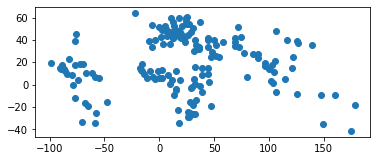

In [14]:
cities_with_country.plot()

GeoPandas provides two spatial-join functions:
- ```GeoDataFrame.sjoin()```: joins based on binary predicates (intersects, contains, etc.) :
    - intersects
    - contains
    - within
    - touches
    - crosses
    - overlaps
- ```GeoDataFrame.sjoin_nearest()```: joins based on proximity, with the ability to set a maximum search radius with ```how``` arguments and two others attributs : 
    - **max_distance** : The max_distance argument specifies a maximum search radius for matching geometries. This can have a considerable performance impact in some cases. If you can, it is highly recommended that you use this parameter.
    - **distance_col** : If set, the resultant GeoDataFrame will include a column with this name containing the computed distances between an input geometry and the nearest geometry.

#### Additional tips

- ```left```: use the index from the first (or ```left_df```) GeoDataFrame that you provide to GeoDataFrame.sjoin(); retain only the ```left_df``` geometry column
- ```right```: use index from second (or ```right_df```); retain only the ```right_df``` geometry column
- ```inner```: use intersection of index values from both GeoDataFrame; retain only the ```left_df``` geometry column